# Python Image Libraries
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [image_libraries.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Tips-and-Tricks/image_libraries.ipynb)
---
Brief overview about some of the main python libraries which promote input and output of digital image files.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from _utils import *

In [2]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

## 1. PIL
---
Reading and writing images using *Python Image Library* [PIL](http://www.pythonware.com/products/pil/).

### 1.1. Installation
---
Install by command line:
``` python
>>> conda install --channel anaconda pillow
```
or
``` python
>>> pip install Pillow
```

### 1.2. Input
---
***PIL*** still doesn't support bit depth greater than 8.

In [3]:
from PIL import Image as pil

In [4]:
%%time
try:
    img_pil = pil.open('../_data/lenna.png')
    img_pil = np.asarray(img_pil)
except:
    print('Can not load image!')

Wall time: 66 ms


### 1.3. Analysis
---

In [5]:
summary(img_pil)

                          R               G               B
       min:         54.0000          1.0000          8.0000
  1st Quar:        146.0000         59.0000         78.0000
    median:        197.0000         97.0000        100.0000
      mean:        180.2240         99.0565        105.4126
  3rd Quar:        220.0000        135.0000        125.0000
       max:        255.0000        248.0000        239.0000
     sigma:         49.0486         52.8771         34.0609


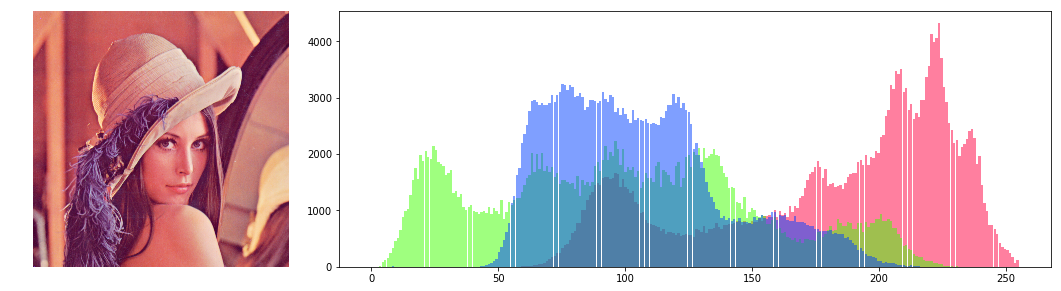

In [6]:
%%time
histogram(img_pil)

### 1.4. Output
---

In [7]:
img = pil.fromarray(img_pil)
#img.save('_output/image_pil.tiff')

Wall time: 1.29 s


## 2. Scipy
---
Reading and writing images using [SciPy](https://www.scipy.org/).

### 2.1. Installation
---
Install by command line:
``` python
>>> conda install scipy
```
ou
``` python
>>> pip install scipy
```

### 2.2. Input
---
***sciPy*** still doesn't support bit depth greater than 8.

In [8]:
import scipy.misc as scipy

In [9]:
%%time
try:
    img_scipy = scipy.imread('../_data/woman01.png')
except:
    print('Can not load image!')

Wall time: 13 ms


### 2.3. Analysis
---

In [10]:
summary(img_scipy)

                          R               G               B
       min:          9.0000          0.0000          6.0000
  1st Quar:         67.0000         56.0000         90.0000
    median:        123.0000        101.0000        123.0000
      mean:        129.2053         99.2666        125.1805
  3rd Quar:        173.0000        134.0000        150.0000
       max:        255.0000        255.0000        255.0000
     sigma:         62.3956         53.3887         39.1241


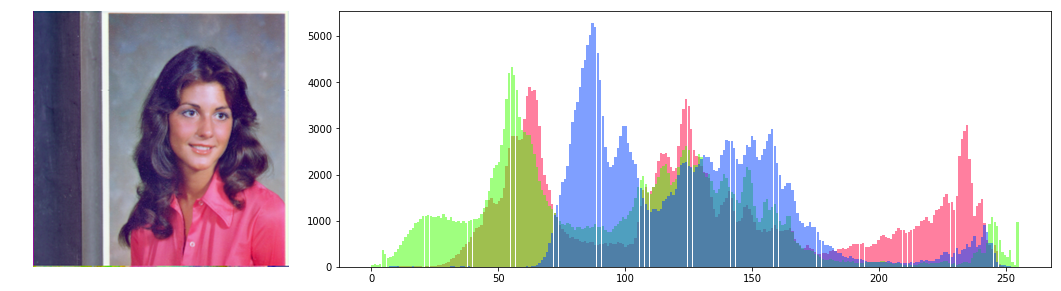

Wall time: 1.38 s


In [11]:
%%time
histogram(img_scipy)

### 2.4. Output
---

In [12]:
#scipy.imsave('_output/image_scipy.tiff', img_scipy8)

## 3. OpenCV
---
Reading and writing images using [OpenCV](http://opencv.org/).

### 3.1. Installation
---
Install by command line:
``` python
>>> conda install --channel menpo opencv
```
or
``` python
>>> pip install opencv-python
```

### 3.2. Input
---
**openCV** supports bit depth greater than 8. The result is in **BGR** mode and it's necessary invert channels to convert to **RGB**.

In [13]:
import cv2

In [14]:
%%time
try:
    img_cv = cv2.imread('../_data/woman02.png', -1)
    b, g, r = cv2.split(img_cv)
    img_cv = cv2.merge((r, g, b))
except:
    print('Can not load image!')

Wall time: 25 ms


### 3.3. Analysis
---

In [15]:
summary(img_cv)

                          R               G               B
       min:          0.0000         22.0000         34.0000
  1st Quar:        128.0000        139.0000        140.0000
    median:        145.0000        142.0000        148.0000
      mean:        137.5893        139.9451        144.0028
  3rd Quar:        147.0000        144.0000        151.0000
       max:        255.0000        255.0000        255.0000
     sigma:         33.8707         29.0540         28.2876


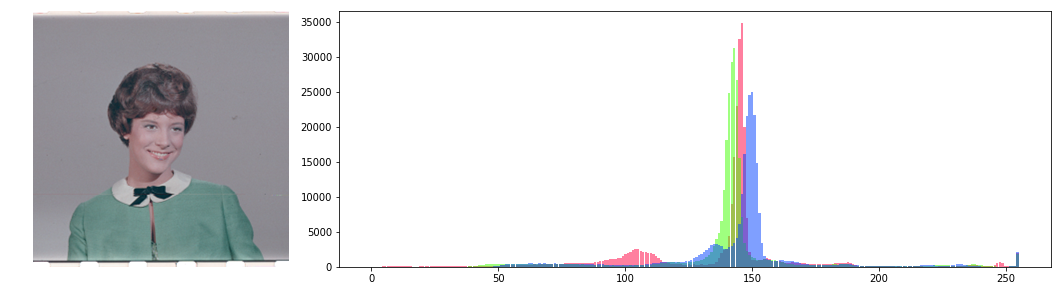

Wall time: 1.36 s


In [16]:
%%time
histogram(img_cv)

### 3.4. Output
---

In [17]:
#cv2.imwrite('_output/image_cv.tiff', img_cv)

### 3.5. Images - 16 and 32 bits
---

In [18]:
%%time
try:
    img_cv8 = cv2.imread('../_data/sphere_8bits.tiff', -1)
    b, g, r = cv2.split(img_cv8)
    img_cv8 = cv2.merge((r, g, b))
except:
    print('Can not load 8 bits image!')

try:
    img_cv16 = cv2.imread('../_data/sphere_16bits.tiff', -1)
    b, g, r = cv2.split(img_cv16)
    img_cv16 = cv2.merge((r, g, b))
except:
    print('Can not load 16 bits image!')

try:
    img_cv32 = cv2.imread('../_data/sphere_32bits.tiff', -1)
    b, g, r = cv2.split(img_cv32)
    img_cv32 = cv2.merge((r, g, b))
except:
    print('Can not load 32 bits image!')

Wall time: 121 ms


In [19]:
print('8 bits')
summary(img_cv8)

8 bits
                          R               G               B
       min:          3.0000          4.0000          3.0000
  1st Quar:         93.0000         92.0000         93.0000
    median:        117.0000        116.0000        118.0000
      mean:        129.5133        122.3053        129.6245
  3rd Quar:        164.0000        141.0000        164.0000
       max:        254.0000        254.0000        255.0000
     sigma:         52.7126         44.4485         52.7339


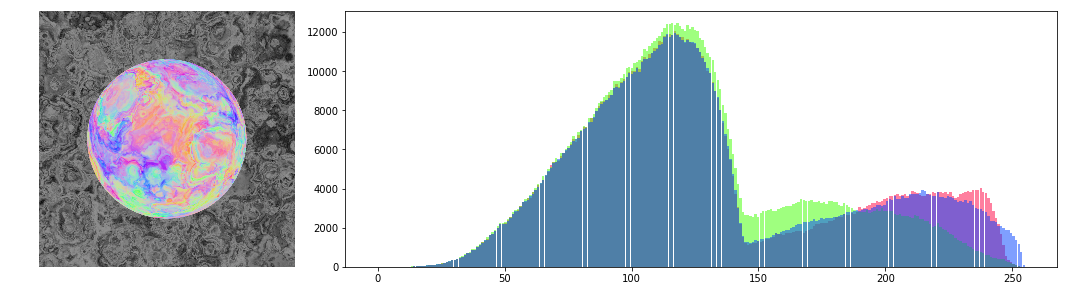

Wall time: 1.53 s


In [20]:
%%time
histogram(img_cv8, bins=2**8, interval=[0, 2**8 - 1])

In [21]:
print('\n16 bits')
summary(img_cv16)


16 bits
                          R               G               B
       min:        863.0000        863.0000        863.0000
  1st Quar:      23796.0000      23648.0000      23828.0000
    median:      30144.0000      29844.0000      30211.0000
      mean:      33284.9283      31432.4724      33313.5088
  3rd Quar:      42053.0000      36328.0000      42116.0000
       max:      65154.0000      65097.0000      65493.0000
     sigma:      13546.7241      11422.8350      13552.2067


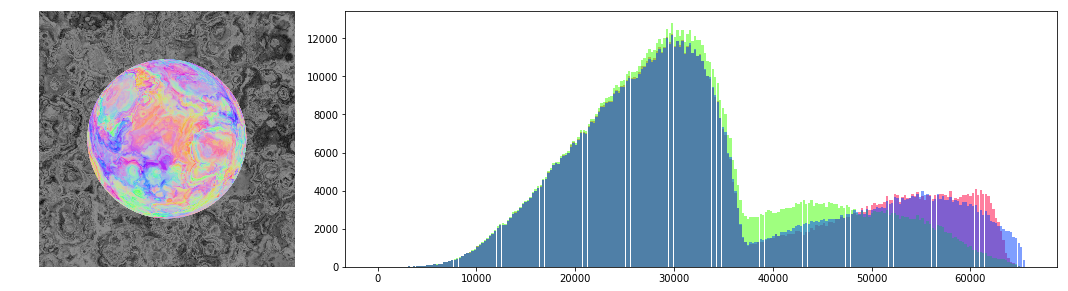

Wall time: 1.5 s


In [22]:
%%time
histogram(img_cv16, bins=2**8, interval=[0, 2**16 - 1])

In [23]:
print('\n32 bits')
summary(img_cv32)


32 bits
                          R               G               B
       min:          0.0010          0.0010          0.0010
  1st Quar:          0.1085          0.1071          0.1088
    median:          0.1788          0.1750          0.1797
      mean:          0.2729          0.2313          0.2734
  3rd Quar:          0.3694          0.2678          0.3706
       max:          0.9868          0.9849          0.9985
     sigma:          0.2392          0.1844          0.2404


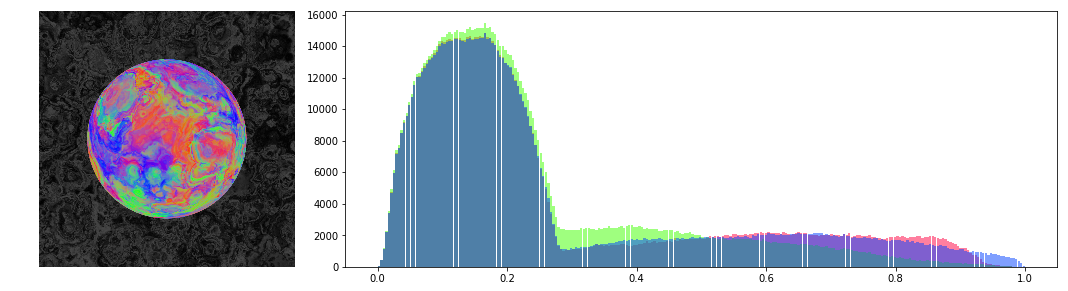

Wall time: 1.42 s


In [24]:
%%time
# colorspace linear
histogram(img_cv32, bins=2**8, interval=[0, 1])

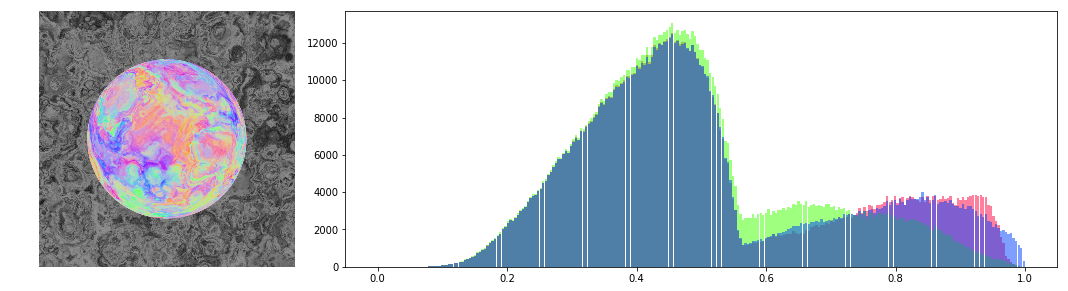

Wall time: 1.55 s


In [25]:
%%time
# colorspace sRGB
histogram(img_cv32**(1/2.2), bins=2**8, interval=[0, 1])

In [26]:
#cv2.imwrite('_output/image_8bit_cv.tiff', img_cv8)
#cv2.imwrite('_output/image_16bit_cv.tiff', img_cv16)
#cv2.imwrite('_output/image_32bit_cv.tiff', img_cv32)

## 4. ImageIO
---
Reading and writing images using [ImageIO](https://imageio.github.io/).

### 4.1. Installation
---
Install by command line:
``` python
>>> conda install -c anaconda imageio
>>> conda install -c dlr-sc freeimageplus
```
or
``` python
>>> pip install imageio
>>> pip install smc.freeimage
```

### 4.2. Input
---

In [27]:
import imageio as iio

In [28]:
%%time
try:
    img_iio = iio.imread('../_data/woman03.png')
except:
    print('Can not load image!')

Wall time: 16 ms


### 4.3. Analysis
---

In [29]:
summary(img_iio)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:         45.0000         20.0000         16.0000
    median:         64.0000         42.0000         37.0000
      mean:         75.8258         52.5630         46.3073
  3rd Quar:        104.0000         77.0000         67.0000
       max:        255.0000        236.0000        224.0000
     sigma:         43.3170         42.1315         38.3552


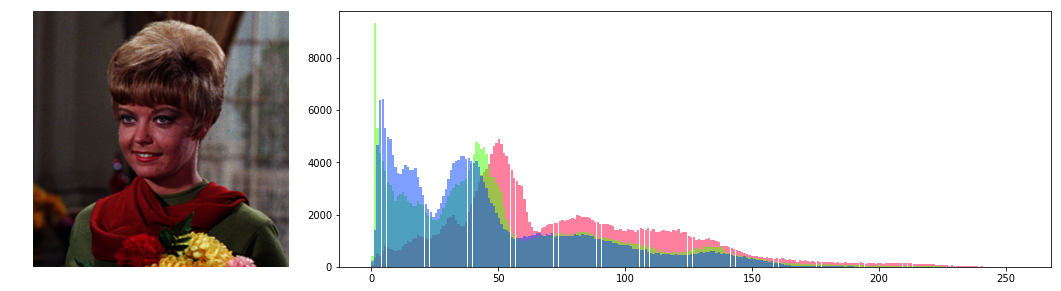

Wall time: 1.36 s


In [30]:
%%time
histogram(img_iio)

### 4.4. Output
---

In [31]:
#iio.imwrite('_output/image_iio.tiff', img_iio)

### 4.5. Images 16 e 32 bits
---

In [33]:
%%time
try:
    img_iio8 = iio.imread('../_data/sphere_8bits.tiff')
except:
    print('Can not load 8 bits image!')

try:
    img_iio16 = iio.imread('../_data/sphere_16bits.tiff')
except:
    print('Can not load 16 bits image!')

try:
    img_iio32 = iio.imread('../_data/sphere_32bits.tiff')
except:
    print('Can not load 32 bits image!')

Wall time: 45 ms


In [34]:
print('8 bits')
summary(img_iio8)

8 bits
                          R               G               B
       min:          3.0000          4.0000          3.0000
  1st Quar:         93.0000         92.0000         93.0000
    median:        117.0000        116.0000        118.0000
      mean:        129.5133        122.3053        129.6245
  3rd Quar:        164.0000        141.0000        164.0000
       max:        254.0000        254.0000        255.0000
     sigma:         52.7126         44.4485         52.7339


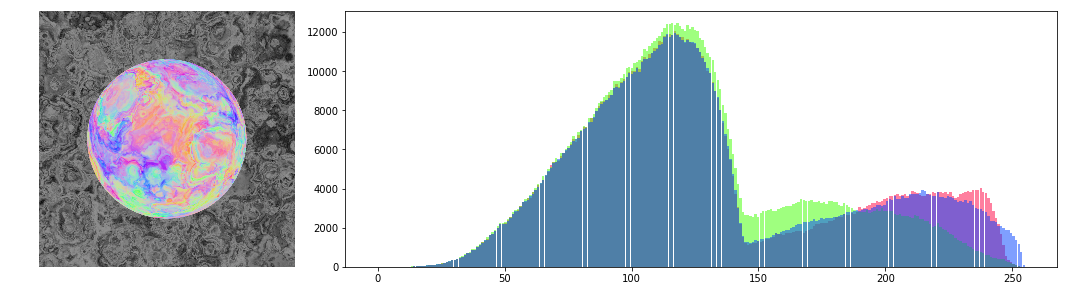

Wall time: 1.49 s


In [35]:
%%time
histogram(img_iio8, bins=2**8, interval=[0, 2**8 - 1])

In [36]:
print('\n16 bits')
summary(img_iio16)


16 bits
                          R               G               B
       min:        863.0000        863.0000        863.0000
  1st Quar:      23796.0000      23648.0000      23828.0000
    median:      30144.0000      29844.0000      30211.0000
      mean:      33284.9283      31432.4724      33313.5088
  3rd Quar:      42053.0000      36328.0000      42116.0000
       max:      65154.0000      65097.0000      65493.0000
     sigma:      13546.7241      11422.8350      13552.2067


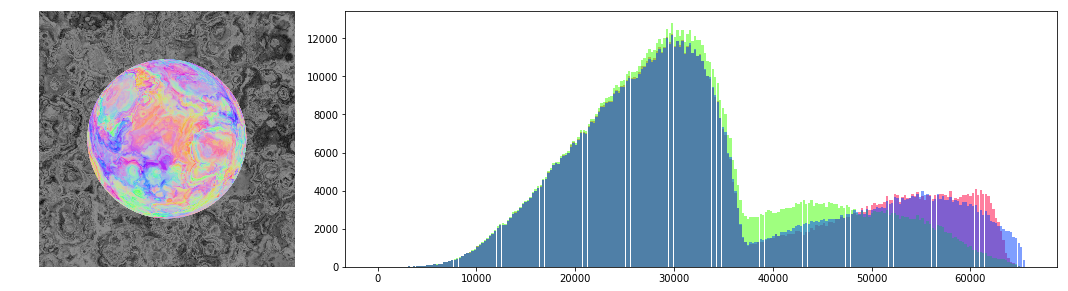

Wall time: 1.52 s


In [37]:
%%time
histogram(img_iio16, bins=2**8, interval=[0, 2**16 - 1])

In [38]:
print('\n32 bits')
summary(img_iio32)


32 bits
                          R               G               B
       min:          0.0010          0.0010          0.0010
  1st Quar:          0.1085          0.1071          0.1088
    median:          0.1788          0.1750          0.1797
      mean:          0.2729          0.2313          0.2734
  3rd Quar:          0.3694          0.2678          0.3706
       max:          0.9868          0.9849          0.9985
     sigma:          0.2392          0.1844          0.2404


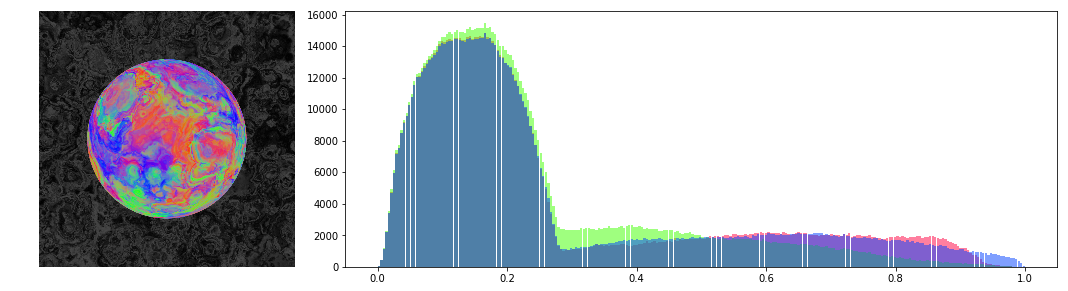

Wall time: 1.45 s


In [39]:
%%time
# colorspace linear
histogram(img_iio32, bins=2**8, interval=[0, 1])

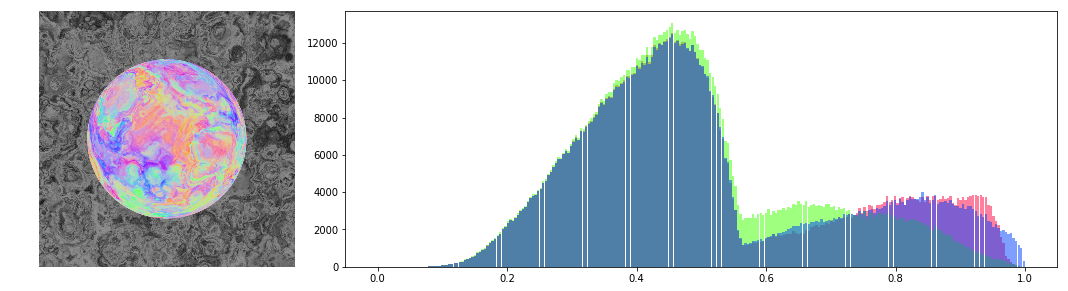

Wall time: 1.48 s


In [40]:
%%time
# colorspace sRGB
histogram(img_iio32**(1/2.2), bins=2**8, interval=[0, 1])

In [41]:
#iio.imwrite('_output/image_8bit_iio.tiff', img_iio8)
#iio.imwrite('_output/image_16bit_iio.tiff', img_iio16)
#iio.imwrite('_output/image_32bit_iio.tiff', img_iio32)